本项目通过利用信用卡的历史交易数据，进行机器学习，构建信用卡反欺诈预测模型，提前发现客户信
用卡被盗刷的事件
数据集包含由欧洲持卡人于2013年9月使用信用卡进行交的数据。此数据集显示两天内发生的交易，其
中284,807笔交易中有492笔被盗刷。数据集非常不平衡，积极的类（被盗刷）占所有交易的0.172％

# 数据预处理

## 导包

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format',lambda x :'%.4f' % x)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno # 可视化工具，pip install missingno

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import auc,roc_auc_score,roc_curve,recall_score,accuracy_score,classification_report

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## 解码数据

In [2]:
data = pd.read_csv('./creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0000,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,...,0.2135,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237,0.7700,0
284803,172787.0000,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,...,0.2142,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535,24.7900,0
284804,172788.0000,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,...,0.2320,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266,67.8800,0
284805,172788.0000,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,...,0.2652,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045,10.0000,0
284806,172792.0000,-0.5334,-0.1897,0.7033,-0.5063,-0.0125,-0.6496,1.5770,-0.4147,0.4862,...,0.2611,0.6431,0.3768,0.0088,-0.4736,-0.8183,-0.0024,0.0136,217.0000,0


In [4]:
print(data.shape)
data.info()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0000,94813.8596,47488.1460,0.0000,54201.5000,84692.0000,139320.5000,172792.0000
V1,284807.0000,0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549
V2,284807.0000,0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577
V3,284807.0000,-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826
V4,284807.0000,0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753
V5,284807.0000,-0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017
V6,284807.0000,0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016
V7,284807.0000,-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895
V8,284807.0000,-0.0000,1.1944,-73.2167,-0.2086,0.0224,0.3273,20.0072
V9,284807.0000,-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950


<AxesSubplot:>

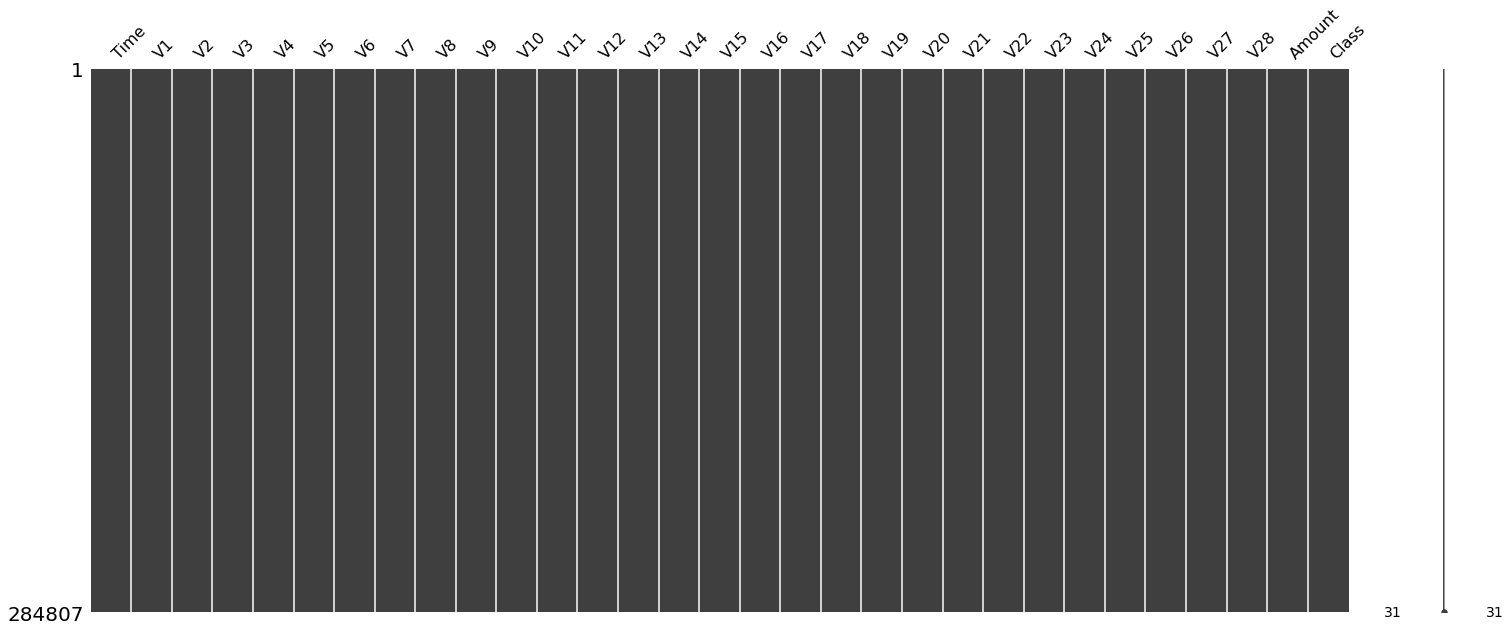

In [6]:
msno.matrix(data)

In [7]:
data.isnull().sum().sum()

0

# 特征工程

## 目标变量

Text(0.5, 1.0, 'Percent of each Class')

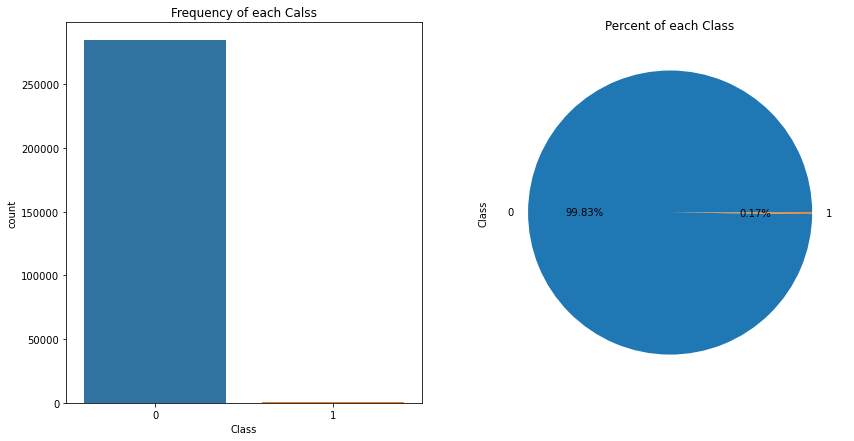

In [8]:
fig,axs = plt.subplots(1,2,figsize = (14,7))

sns.countplot(x = 'Class',data = data,ax = axs[0])
axs[0].set_title('Frequency of each Calss')

data['Class'].value_counts().plot(kind = 'pie',ax = axs[1],autopct = '%1.2f%%')
axs[1].set_title('Percent of each Class')

In [9]:
data.groupby(by = 'Class').size()

Class
0    284315
1       492
dtype: int64

数据集284,807笔交易中有492笔是信用卡被盗刷交易，信用卡被盗刷交易占总体比例为0.17%，信用卡
交易正常和被盗刷两者数量不平衡，样本不平衡影响分类器的学习，稍后我们将会使用过采样的方法解
决样本不平衡的问题。

## 特征衍生

In [10]:
data.head() # 时间以秒为单位，离散性太强

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


特征Time的单为秒，我们将其转化为以小时为单位对应每天的时间。

In [16]:
l = [lambda x : divmod(x,360)]
display(l)

[<function __main__.<lambda>(x)>]

In [17]:
data['Hour'] = data['Time'].apply(lambda x : divmod(x,3600)[0])
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0,0.0000
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0,0.0000
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0,0.0000
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0,0.0000
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0000,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,...,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237,0.7700,0,47.0000
284803,172787.0000,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,...,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535,24.7900,0,47.0000
284804,172788.0000,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,...,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266,67.8800,0,47.0000
284805,172788.0000,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,...,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045,10.0000,0,47.0000


#  特征选择

## 信用卡正常消费和盗刷对比

Text(0.5, 1.0, 'Fraud')

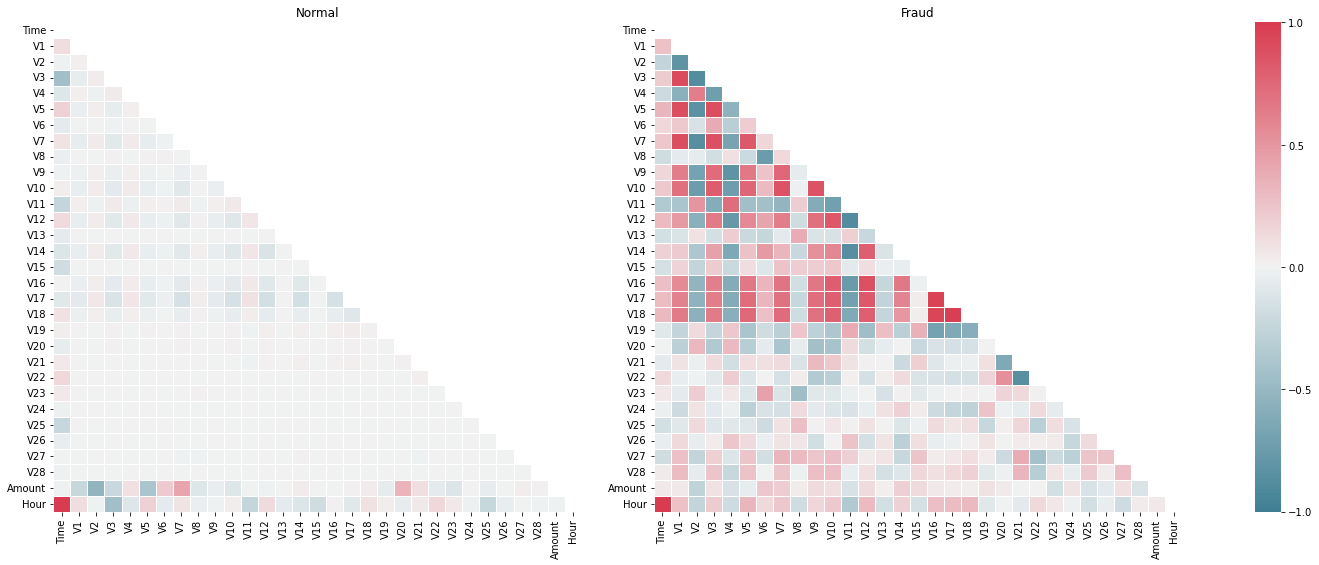

In [18]:
XFraud = data.loc[data['Class'] == 1] # 盗刷
XnonFraud = data.loc[data['Class'] == 0] # 正常消费

correlationNonFraud = XnonFraud.loc[:,data.columns != 'Class'].corr()

mask = np.zeros_like(correlationNonFraud)

index = np.triu_indices_from(correlationNonFraud) # 右上部分的索引
mask[index] = True # mask 面具，0没有面具，1表示有面具

kw = {'width_ratios':[1,1,0.05],'wspace':0.2}
f,(ax1,ax2,ax3) = plt.subplots(1,3,gridspec_kw=kw,figsize = (22,9))


cmap = sns.diverging_palette(220,8,as_cmap = True) # 一系列颜色
sns.heatmap(correlationNonFraud,ax = ax1,vmin = -1,vmax = 1,square=False,
            linewidths=0.5,mask = mask,cbar=False,cmap= cmap)
ax1.set_title('Normal')

correlationFraud = XFraud.loc[:,data.columns != 'Class'].corr()
sns.heatmap(correlationFraud,vmin = -1,vmax= 1,cmap = cmap,ax = ax2,
            square=False,linewidths=0.5,mask = mask,yticklabels=True,cbar_ax=ax3,
           cbar_kws={'orientation':'vertical','ticks':[-1,-0.5,0,0.5,1]})

ax2.set_title('Fraud')

其中变量V1、V2、V3、
V4、V5、V6、V7、V9、V10、V11、V12、V14、V16、V17和V18以及V19之间的变化在信用卡被盗刷
的样本中呈性一定的规律。

In [19]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

## 交易金额和交易次数

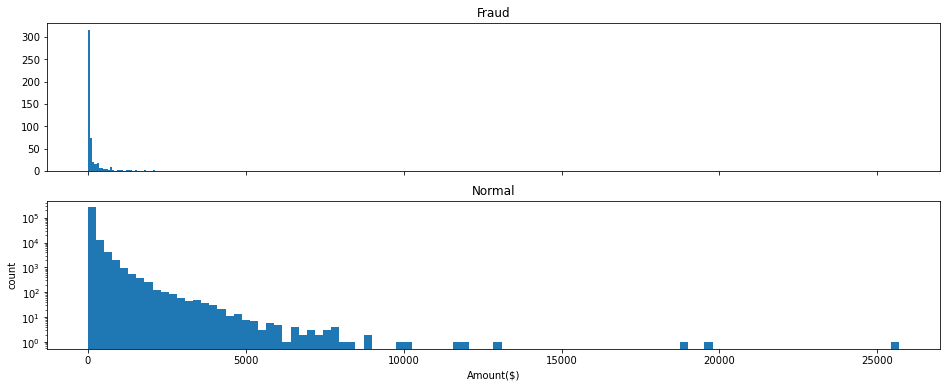

In [20]:
f,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize = (16,6))

ax1.hist(data['Amount'][data['Class'] == 1],bins = 30)
ax1.set_title('Fraud')
plt.yscale('log')


ax2.hist(data['Amount'][data['Class'] == 0],bins = 100)
ax2.set_title('Normal')

plt.xlabel('Amount($)')
plt.ylabel('count')
plt.yscale('log')

信用卡被盗刷发生的金额与信用卡正常用户发生的金额相比呈现散而小的特点，这说明信用卡盗刷者为
了不引起信用卡卡主的注意，更偏向选择小金额消费。

## 信用卡盗刷时间

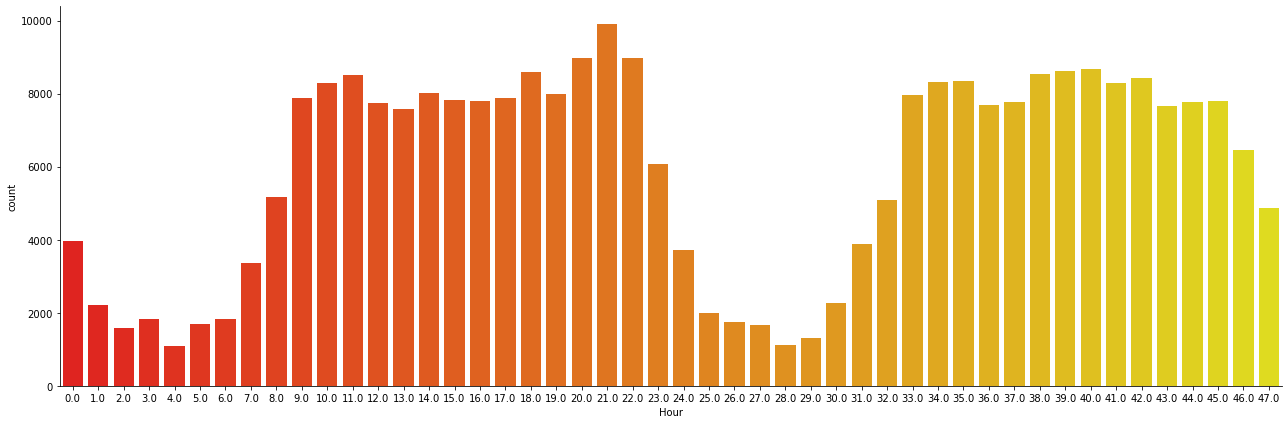

In [22]:
sns.factorplot(x = 'Hour',data = data,kind = 'count',palette = 'autumn',size = 6,
               aspect = 3)

每天早上9点到晚上11点之间是信用卡消费的高频时间段

## 交易金额和交易时间关系

Text(0.5, 1.0, 'Normal')

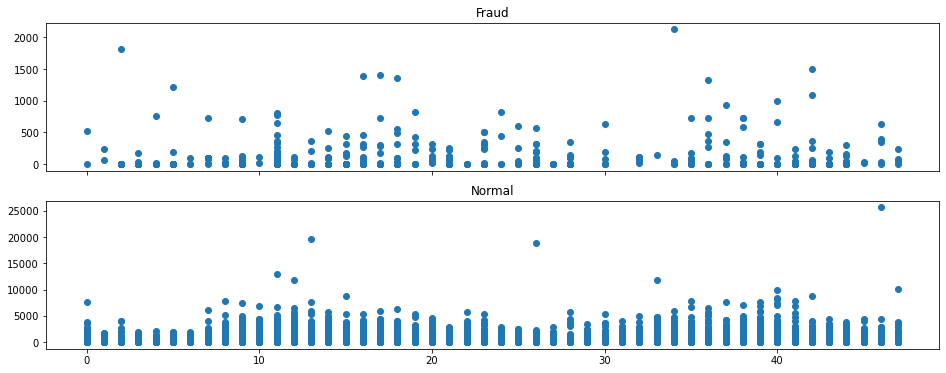

In [23]:
f,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize = (16,6))

cond1 = data['Class'] == 1
ax1.scatter(data['Hour'][cond1],data['Amount'][cond1])
ax1.set_title('Fraud')

cond2 = data['Class'] == 0
ax2.scatter(data['Hour'][cond2],data['Amount'][cond2])
ax2.set_title('Normal')

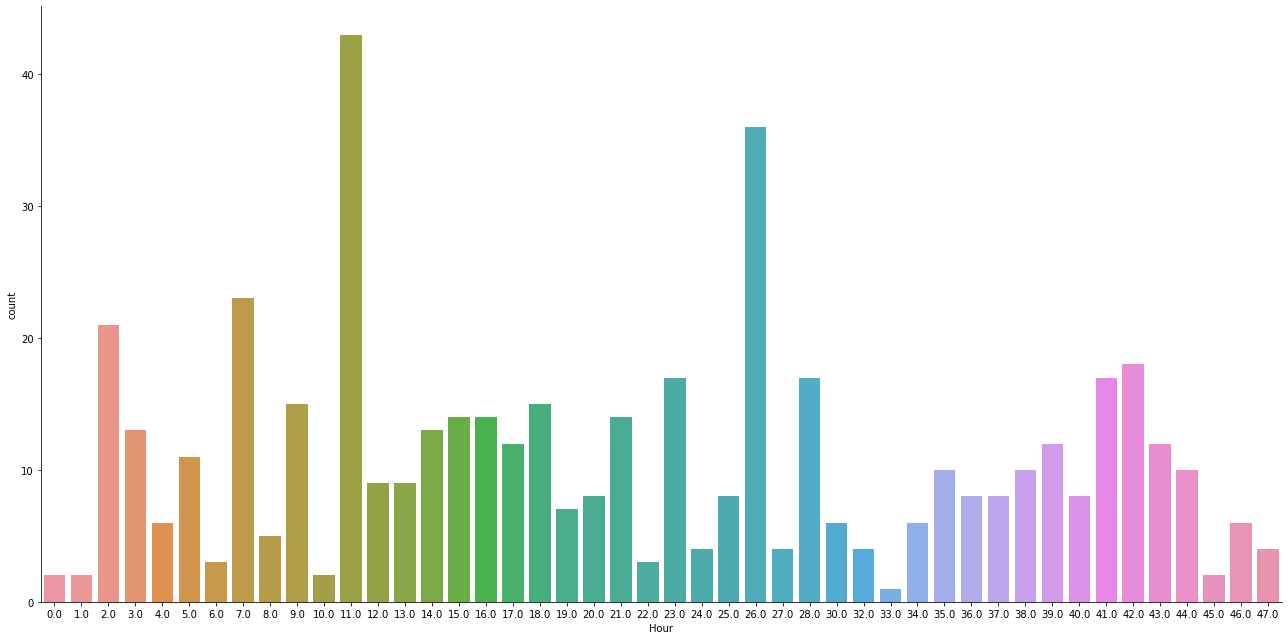

In [24]:
sns.catplot(x = 'Hour',kind = 'count',data = data[cond1],height=9,aspect=2)

In [25]:
data['Amount'][cond1].max()

2125.87

## 特征分布(！！！帮助筛选特征)

In [26]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0,0.0000
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0,0.0000
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0,0.0000
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0,0.0000
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0,0.0000


In [27]:
from matplotlib import font_manager
fm = font_manager.FontManager()
[font.name for font in fm.ttflist]

['cmtt10',
 'DejaVu Sans Mono',
 'cmex10',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'cmss10',
 'STIXNonUnicode',
 'cmmi10',
 'STIXGeneral',
 'cmb10',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'cmsy10',
 'DejaVu Serif',
 'STIXSizeFiveSym',
 'STIXSizeTwoSym',
 'cmr10',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'Krungthep',
 'STIXIntegralsSm',
 'STIXSizeTwoSym',
 'Al Bayan',
 'Times New Roman',
 'Arial Black',
 'Noto Sans Psalter Pahlavi',
 'Diwan Kufi',
 'Al Tarikh',
 'Nadeem',
 'Kokonor',
 'Noto Sans Hatran',
 'Lucida Grande',
 'Baskerville',
 'Bodoni 72 Smallcaps',
 'Optima',
 'Ayuthaya',
 'Kannada MN',
 'Al Nile',
 'STIXIntegralsSm',
 'STIXSi

In [28]:
sns.__version__

'0.11.2'

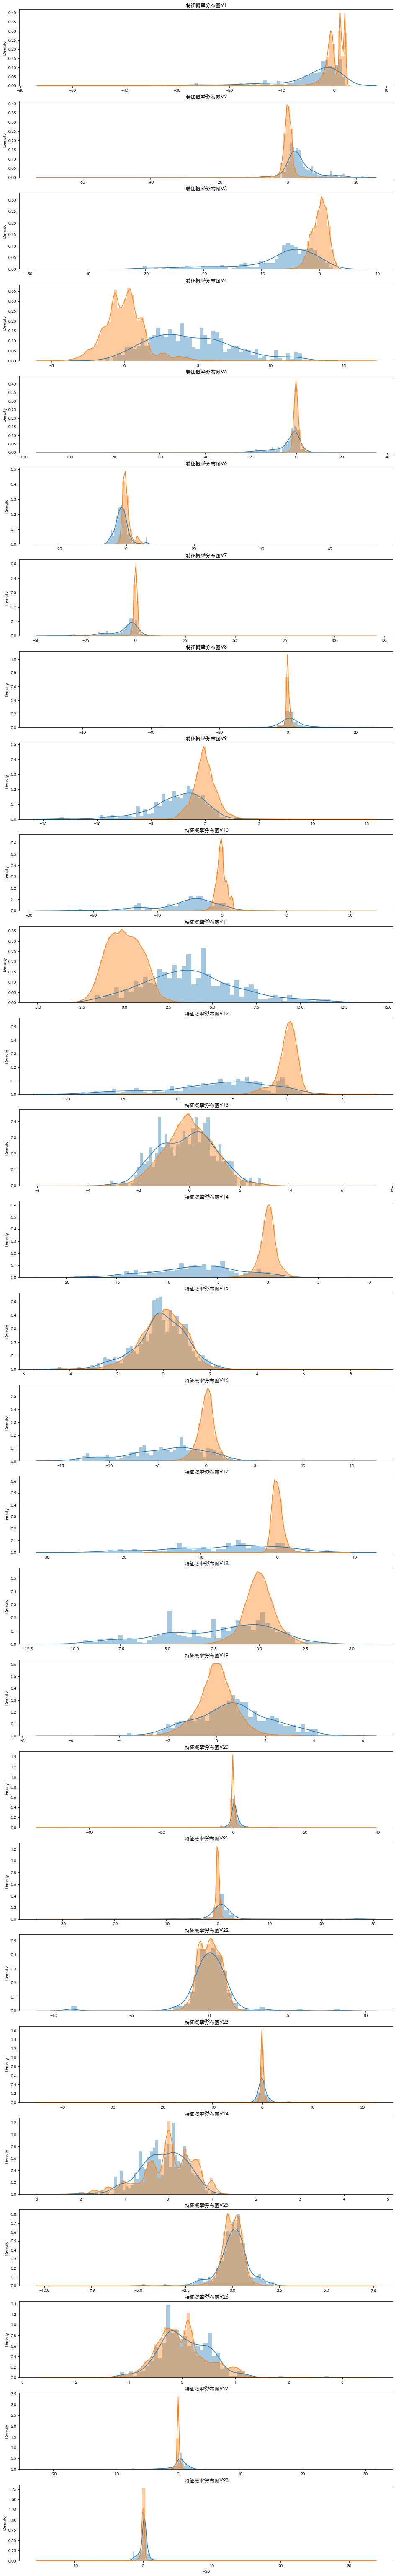

In [31]:
plt.rcParams['font.family'] = 'Heiti TC '
v_feat = data.iloc[:,1:29].columns
plt.figure(figsize=(16,4 * 28))
cond1 = data['Class'] == 1
cond2 = data['Class'] == 0

gs = gridspec.GridSpec(28,1) # 子视图
for i,cn in enumerate(v_feat):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][cond1],bins = 50) # 欺诈
    sns.distplot(data[cn][cond2],bins = 100) # 正常消费
    ax.set_title('特征概率分布图' + str(cn))

上图是不同变量在信用卡被盗刷和信用卡正常的不同分布情况，我们将选择在不同信用卡状态下的分布有明显区别的变量。因此剔除变量V8、V13 、V15 、V20 、V21 、V22、 V23 、V24 、V25 、V26 、V27 和V28变量。这也与我们开始用相关性图谱观察得出结论一致。同时剔除变量Time，保留离散程度更小的Hour变量。

In [32]:
droplist = ['V8','V13','V15','V20','V21','V22','V23','V24','V25','V26','V27','V28','Time']

data_new = data.drop(labels=droplist,axis = 1)
display(data.shape, data_new.shape)

(284807, 32)

(284807, 19)

In [34]:
data_new.head(5)

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.3638,0.0908,-0.5516,-0.6178,-0.3112,-0.4704,0.2080,0.0258,0.4040,149.6200,0,0.0000
1,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,-0.2554,-0.1670,1.6127,1.0652,-0.1438,0.4639,-0.1148,-0.1834,-0.1458,2.6900,0,0.0000
2,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,-1.5147,0.2076,0.6245,0.0661,-0.1659,-2.8901,1.1100,-0.1214,-2.2619,378.6600,0,0.0000
3,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,-1.3870,-0.0550,-0.2265,0.1782,-0.2879,-1.0596,-0.6841,1.9658,-1.2326,123.5000,0,0.0000
4,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,0.8177,0.7531,-0.8228,0.5382,-1.1197,-0.4514,-0.2370,-0.0382,0.8035,69.9900,0,0.0000


# 特征缩放

由于特征Hour和Amount的规格和其他特征相差较大，因此我们需对其进行特征缩放

In [35]:
col = ['Amount','Hour']
sc = StandardScaler() # Z-score归一化

data_new[col] = sc.fit_transform(data_new[col])
data_new.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.3638,0.0908,-0.5516,-0.6178,-0.3112,-0.4704,0.2080,0.0258,0.4040,0.2450,0,-1.9603
1,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,-0.2554,-0.1670,1.6127,1.0652,-0.1438,0.4639,-0.1148,-0.1834,-0.1458,-0.3425,0,-1.9603
2,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,-1.5147,0.2076,0.6245,0.0661,-0.1659,-2.8901,1.1100,-0.1214,-2.2619,1.1607,0,-1.9603
3,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,-1.3870,-0.0550,-0.2265,0.1782,-0.2879,-1.0596,-0.6841,1.9658,-1.2326,0.1405,0,-1.9603
4,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,0.8177,0.7531,-0.8228,0.5382,-1.1197,-0.4514,-0.2370,-0.0382,0.8035,-0.0734,0,-1.9603


In [36]:
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0000,0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549
V2,284807.0000,0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577
V3,284807.0000,-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826
V4,284807.0000,0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753
V5,284807.0000,-0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017
V6,284807.0000,0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016
V7,284807.0000,-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895
V9,284807.0000,-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950
V10,284807.0000,0.0000,1.0888,-24.5883,-0.5354,-0.0929,0.4539,23.7451
V11,284807.0000,0.0000,1.0207,-4.7975,-0.7625,-0.0328,0.7396,12.0189


# 特征重要性

1、构建X变量和y变量

In [54]:
feature = list(data_new.columns) 
feature.remove('Class') 
X = data_new[feature] 
y = data_new['Class']

In [39]:
feature

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'Amount',
 'Hour']

2、利用随机森林的feature importance对特征的重要性进行排序

In [55]:
names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'Amount', 'Hour'],
      dtype='object')

In [44]:
names = data[feature].columns 
from sklearn.ensemble import RandomForestClassifier 
clf=RandomForestClassifier(n_estimators=100)
#构建分类随机森林分类器 
clf.fit(X, y) #对自变量和因变量进行拟合 
names, clf.feature_importances_ 
for feature in zip(names, clf.feature_importances_): 
    print(feature)

KeyError: ('Hour', 0.015038621844984739)

In [56]:
clf = RandomForestClassifier()

clf.fit(X,y)
clf.feature_importances_

array([0.02009485, 0.01435519, 0.02202151, 0.0403991 , 0.01791401,
       0.02158274, 0.03324931, 0.051148  , 0.08913674, 0.07227648,
       0.16585201, 0.1320479 , 0.05755611, 0.18598825, 0.02782153,
       0.01614706, 0.01799299, 0.01441621])

In [57]:
feature = list(data_new.columns)
print(feature)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Amount', 'Class', 'Hour']


In [47]:
plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('dark_background')

In [46]:
from matplotlib import style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [58]:
len(feature)

19

In [60]:
feature.remove('Class') # 特征名，修改原数据
feature

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'Amount',
 'Hour']

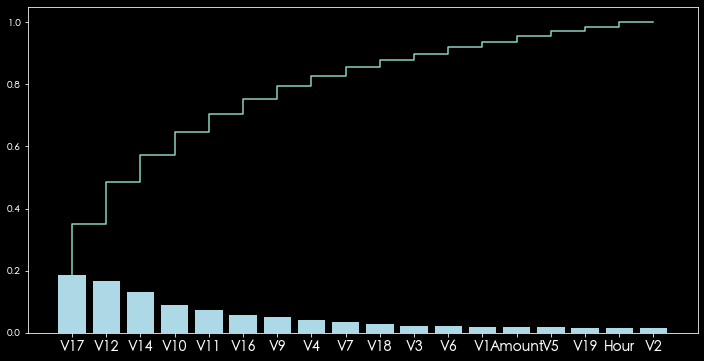

In [63]:
importances = clf.feature_importances_
feat_name = feature
feat_name = np.array(feat_name)
index = np.argsort(importances)[::-1]

plt.bar(range(len(index)),importances[index],color = 'lightblue')
plt.step(range(18),np.cumsum(importances[index]))
_ = plt.xticks(range(18),labels=feat_name[index],rotation = 0,fontsize = 14)

In [ ]:
#特征重要性可视化 
importances = clf.feature_importances_ 
feat_names = names 
indices = np.argsort(importances)[::-1] 
fig = plt.figure(figsize=(20,6)) 
plt.title("Feature importances by RandomTreeClassifier") 
plt.bar(range(len(indices)), importances[indices], color='lightblue') 
plt.step(range(len(indices)), np.cumsum(importances[indices])) 
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14) 
plt.xlim([-1, len(indices)])

# 模型训练

## 解决过采样问题

In [64]:
from imblearn.over_sampling import SMOTE # 近邻规则，创造一些新数据

In [65]:
print('在过采样之前样本比例：\n',y.value_counts())

在过采样之前样本比例：
 0    284315
1       492
Name: Class, dtype: int64


In [66]:
smote = SMOTE()
# X，y是数据
X,y = smote.fit_resample(X,y)
print('在过采样之后样本比例是：\n',y)

在过采样之后样本比例是：
 0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64


In [67]:
y.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

## 算法建模

### 准确率

In [68]:
model = LogisticRegression()
model.fit(X,y) # 样本是均衡的
y_ = model.predict(X)
print('逻辑斯蒂回归算准确率是：',accuracy_score(y,y_))
# 信用卡反欺诈，更希望算法，找到盗刷的交易！
# 正常交易，不关心！

逻辑斯蒂回归算准确率是： 0.9381636565077467


### 混淆矩阵和召回率

In [69]:
from sklearn.metrics import confusion_matrix # 混淆矩阵

In [70]:
cm = confusion_matrix(y,y_)
print(cm)
recall = cm[1,1]/(cm[1,1] + cm[1,0])
print('召回率：',recall)

[[277011   7304]
 [ 27858 256457]]
召回率： 0.9020171288887325


In [71]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    绘制预测结果与真实结果的混淆矩阵
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [79]:
plt.rcParams['figure.figsize'] = (8,6)
plt.style.use('fivethirtyeight')

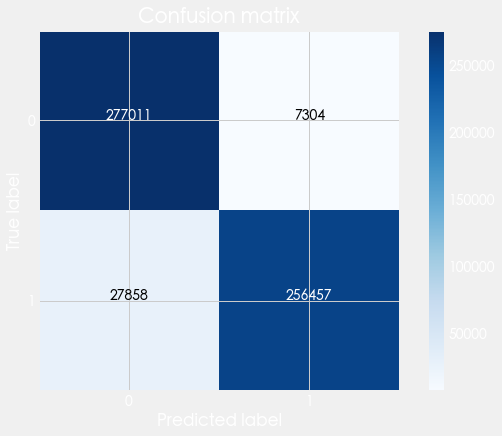

In [80]:
import itertools
plot_confusion_matrix(cm,classes=[0,1])

### ROC与AUC

Text(0.5, 0, 'False Positive Rate')

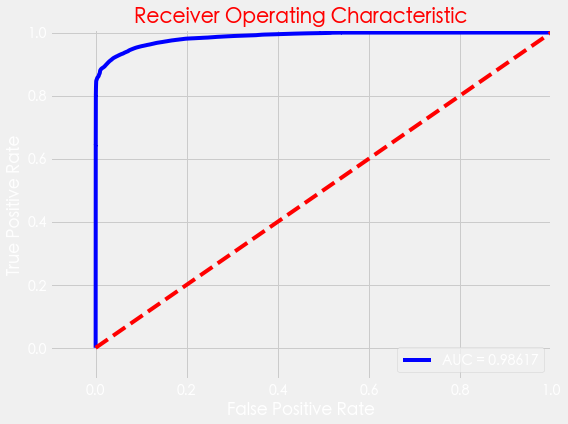

In [84]:
proba_ = model.predict_proba(X)[:,1]# 索引1，表示获取类别1的概率，正样本，阳性，信用卡盗刷

fpr,tpr,thesholds_ = roc_curve(y,proba_)

roc_auc = auc(fpr,tpr) # 曲线下面积

# 绘制 ROC曲线
plt.title('Receiver Operating Characteristic',color = 'r')
plt.plot(fpr, tpr, 'b',label='AUC = %0.5f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## 交叉验证

1、交叉验证筛选参数

In [85]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# 构建参数组合
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000,],'penalty': [ 'l1', 'l2']}

# 确定模型LogisticRegression，和参数组合param_grid ，cv指定10折
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=10) 

grid_search.fit(X_train, y_train) # 使用训练集学习算法

CPU times: user 48.6 s, sys: 45.9 s, total: 1min 34s
Wall time: 25.9 s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

2、查看最佳参数

In [86]:
results = pd.DataFrame(grid_search.cv_results_) 
display(results)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0122,0.0043,0.0000,0.0000,0.0100,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.4091,0.0090,0.0033,0.0003,0.0100,l2,"{'C': 0.01, 'penalty': 'l2'}",0.9410,0.9386,0.9387,0.9384,0.9383,0.9364,0.9373,0.9395,0.9378,0.9375,0.9384,0.0012,6
2,0.0108,0.0001,0.0000,0.0000,0.1000,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
3,0.3931,0.0183,0.0034,0.0004,0.1000,l2,"{'C': 0.1, 'penalty': 'l2'}",0.9411,0.9387,0.9388,0.9384,0.9384,0.9364,0.9374,0.9395,0.9377,0.9375,0.9384,0.0012,5
4,0.0108,0.0001,0.0000,0.0000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,0.4035,0.0147,0.0034,0.0002,1,l2,"{'C': 1, 'penalty': 'l2'}",0.9411,0.9387,0.9388,0.9384,0.9384,0.9364,0.9374,0.9395,0.9377,0.9375,0.9384,0.0012,1
6,0.0109,0.0002,0.0000,0.0000,10,l1,"{'C': 10, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
7,0.4086,0.0215,0.0033,0.0003,10,l2,"{'C': 10, 'penalty': 'l2'}",0.9411,0.9387,0.9388,0.9384,0.9384,0.9364,0.9374,0.9395,0.9377,0.9375,0.9384,0.0012,2
8,0.0108,0.0001,0.0000,0.0000,100,l1,"{'C': 100, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
9,0.3997,0.0141,0.0034,0.0006,100,l2,"{'C': 100, 'penalty': 'l2'}",0.9411,0.9387,0.9388,0.9384,0.9384,0.9364,0.9374,0.9395,0.9377,0.9375,0.9384,0.0012,2


Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.93840


3. 测评数据的评估

In [87]:
y_pred = grid_search.predict(X_test)

print('准确率：',accuracy_score(y_test,y_pred))

准确率： 0.9372351089460633


4 . 分类效果评估报告

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     56718
           1       0.97      0.90      0.93     57008

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726



## 混淆矩阵

### 测试数据混淆矩阵

Recall metric in the testing dataset:  0.9004350266629245


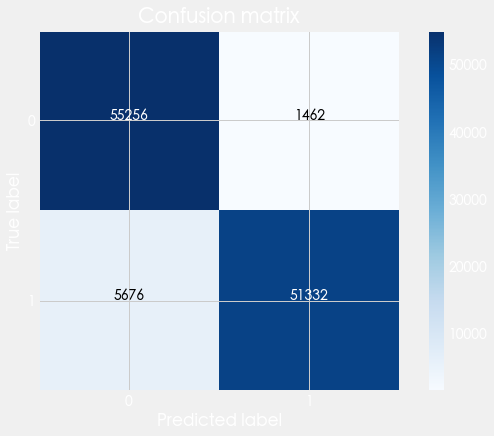

In [90]:
# 生成测试数据混淆矩阵
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制模型优化后的混淆矩阵
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')

### 全部数据混淆矩阵

Recall metric in the testing dataset:  0.9020909906265937


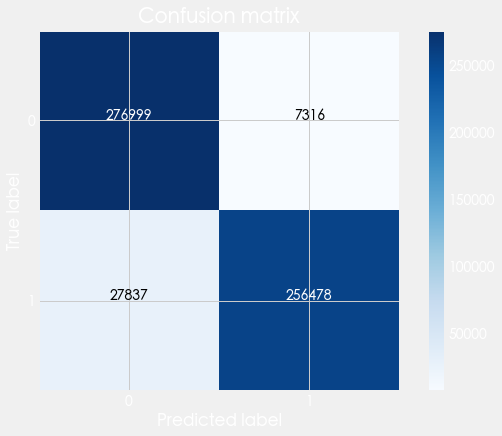

In [91]:
# 生成全部数据混淆矩阵

y_ = grid_search.predict(X) # 优化后的算法，最佳参数C：10，pentaly：l2

cnf_matrix = confusion_matrix(y, y_)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制模型优化后的混淆矩阵
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')

# 模型评估

模型评估与优化

上一个步骤中，我们的模型训练和测试都在同一个数据集上进行，这样导致模型产生过拟合的问题。
一般来说，将数据集划分为训练集和测试集有3种处理方法：
留出法（hold-out）
交叉验证法（cross-validation）
自助法（bootstrapping）
本次项目采用的是交叉验证法划分数据集，将数据划分为3部分：训练集（training set）、验证集
（validation set）和测试集（test set）。让模型在训练集进行学习，在验证集上进行参数调优，最后使
用测试集数据评估模型的性能。
模型调优我们采用网格搜索调优参数（grid search），通过构建参数候选集合，然后网格搜索会穷举各
种参数组合，根据设定评定的评分机制找到最好的那一组设置。
结合cross-validation和grid search，具体操作我们采用scikit learn模块model_selection中的
GridSearchCV方法。

## 混淆矩阵

召回率是： 0.9827918888577042	准确率是： 0.8759474526493501
召回率是： 0.9548133595284872	准确率是： 0.92738687723124
召回率是： 0.9303080269435868	准确率是： 0.9365580430156693
召回率是： 0.9149242211619422	准确率是： 0.9386595853191003
召回率是： 0.9004350266629245	准确率是： 0.9372351089460633
召回率是： 0.8892085321358406	准确率是： 0.9353533932434096
召回率是： 0.8838584058377772	准确率是： 0.9352127042189121
召回率是： 0.8770172607353354	准确率是： 0.9331727133636987
召回率是： 0.8621772382823464	准确率是： 0.9272373951427114


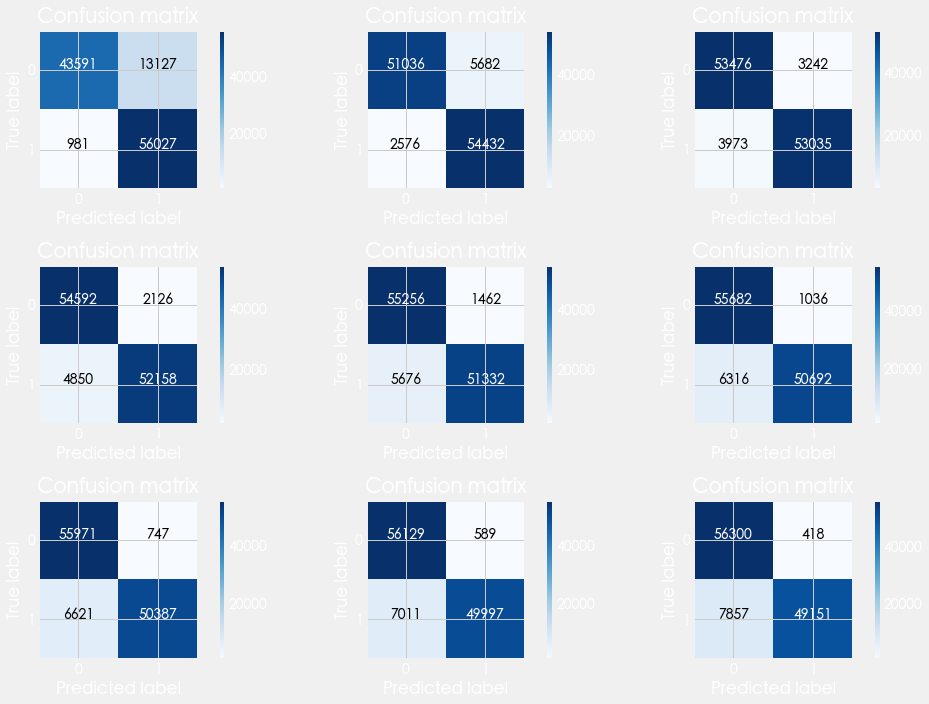

In [92]:
# 获得预测概率值
y_pred_proba = grid_search.predict_proba(X_test) 

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  # 设定不同阈值

plt.figure(figsize=(15,10))
np.set_printoptions(precision=2)
j = 1
for t in thresholds:
    # 根据阈值转换为类别 
    y_pred = y_pred_proba[:,1] > t
    plt.subplot(3,3,j)
    j += 1
    # 计算混淆矩阵
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print("召回率是：", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]),end = '\t')
    print('准确率是：',(cnf_matrix[0,0] + cnf_matrix[1,1])/(cnf_matrix.sum()))
    # 绘制混淆矩阵
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix, classes=class_names)

## 精确率-召回率

In [93]:
from sklearn.metrics import precision_recall_curve

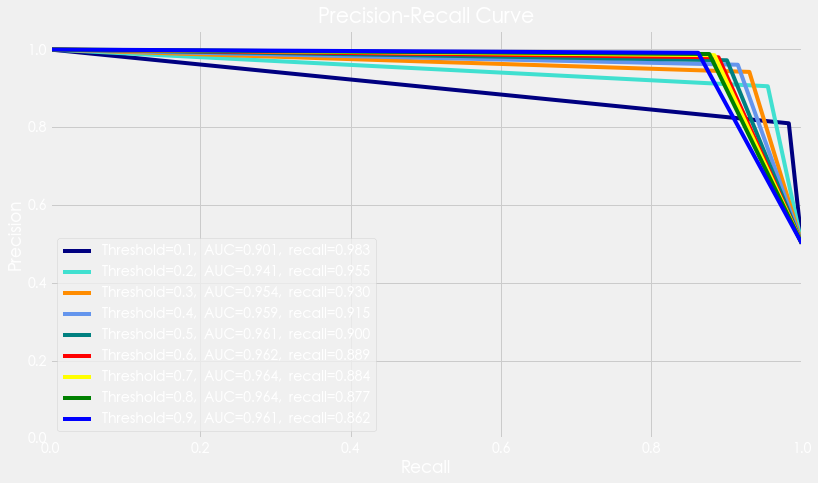

In [94]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue']

plt.figure(figsize=(12,7))

j = 1
for t,color in zip(thresholds,colors):
    y_pred = y_pred_proba[:,1] > t #预测出来的概率值是否大于阈值  

    precision, recall, threshold = precision_recall_curve(y_test, y_pred)
    area = auc(recall, precision)
    cm = confusion_matrix(y_test,y_pred)
    # TP/(TP + FN)
    r = cm[1,1]/(cm[1,0] + cm[1,1])
  
    # 绘制 Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold=%s,  AUC=%0.3f,  recall=%0.3f' %(t,area,r))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

## ROC曲线

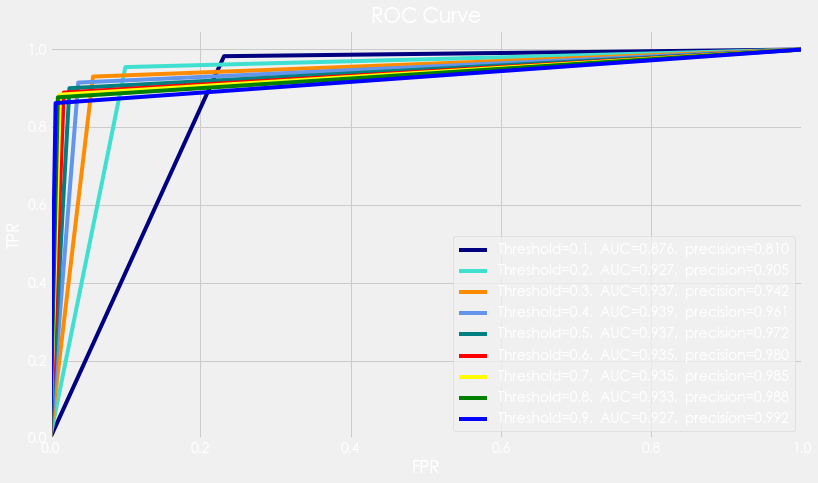

In [98]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue']

plt.figure(figsize=(12,7))

j = 1
for t,color in zip(thresholds,colors):
#     y_pred = grid_search.predict(X_teste) # 算法预测测试数据的值
    y_pred = y_pred_proba[:,1] >= t #预测出来的概率值是否大于阈值 （人为） 
  
    cm = confusion_matrix(y_test,y_pred)
    # TP/(TP + FP)
    precision = cm[1,1]/(cm[0,1] + cm[1,1])

    fpr,tpr,_ = roc_curve(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
  
    auc_ = auc(fpr,tpr)
  
    # 绘制 ROC curve
    plt.plot(fpr, tpr, color=color,
                 label='Threshold=%s,  AUC=%0.3f,  precision=%0.3f' %(t , auc_,precision))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

## 每个评估指标趋势图

Text(0.5, 0, 'thresholds')

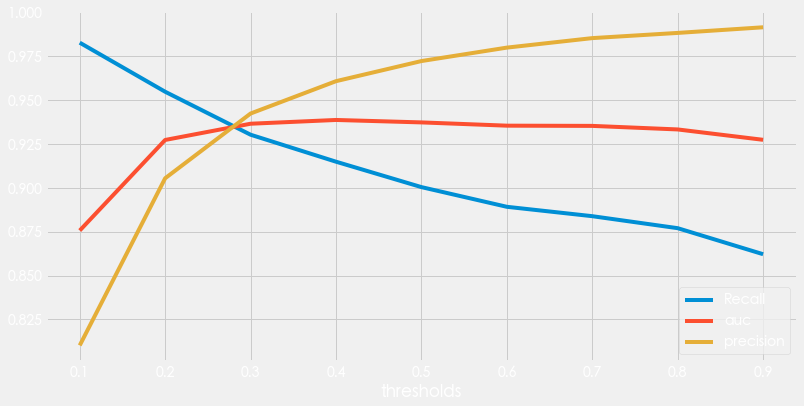

In [99]:
'''
true negatives:`C_{0,0}`
false negatives: `C_{1,0}` 
true positives is:`C_{1,1}` 
false positives is :`C_{0,1}`
'''
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
recalls = [] # 召回率
precisions = [] # 精确度
aucs = [] # 曲线下面积
y_pred_proba = grid_search.predict_proba(X_test)
for threshold in thresholds:
    y_ = y_pred_proba[:,1] >= threshold
    cm = confusion_matrix(y_test,y_)
    # TP/(TP + FN)
    recalls.append(cm[1,1]/(cm[1,0] + cm[1,1])) # 召回率，从真的癌症患者中找出来的比例，200,85个，42.5%
    # TP/(TP + FP)
    precisions.append(cm[1,1]/(cm[0,1] + cm[1,1])) # 精确率，找到癌症患者，100个，85个真的，15个没病，预测有病
    fpr,tpr,_ = roc_curve(y_test,y_)
    auc_ = auc(fpr,tpr)
    aucs.append(auc_)
    
plt.figure(figsize=(12,6))
plt.plot(thresholds,recalls,label = 'Recall')
plt.plot(thresholds,aucs,label = 'auc')
plt.plot(thresholds,precisions,label = 'precision')
plt.legend()
plt.xlabel('thresholds')